In [2]:
%matplotlib inline
import matplotlib
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as P
from matplotlib.colors import LogNorm
from astropy.io import fits as F
from astropy import units as u
from astropy.coordinates import SkyCoord
from calc_kcor import calc_kcor

In [3]:
data = Table.read('/Users/becky/Projects/followup_gv/bpt/bpt_type_2_petro_psf_mag_sdss_GZ2_GALEX_PSF_AUTO_mag.fits', format='fits')

In [4]:
n = F.open('/Users/becky/Projects/followup_gv/oh_sample/SFD_dust_4096_ngp.fits')
s = F.open('/Users/becky/Projects/followup_gv/oh_sample/SFD_dust_4096_sgp.fits')

In [5]:
ngp = n[0].data
sgp = s[0].data

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


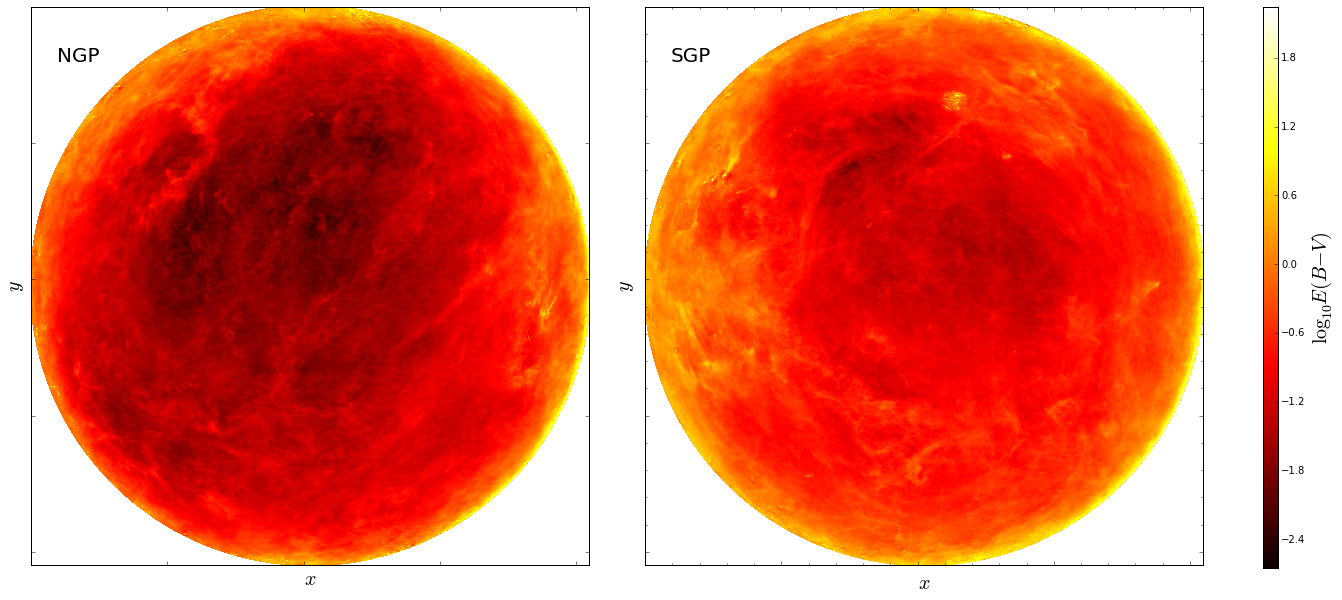

In [7]:
fig = P.figure(figsize=(22,10))
ax1 = P.subplot(121)
ax2 = P.subplot(122)
m1 = ax1.imshow(np.log10(ngp), cmap=P.cm.hot)
m2 = ax2.imshow(np.log10(sgp), cmap=P.cm.hot)
ax1.set_xlabel(r'$x$', fontsize=20)
ax1.set_ylabel(r'$y$', fontsize=20)
ax2.set_xlabel(r'$x$', fontsize=20)
ax2.set_ylabel(r'$y$', fontsize=20)
ax1.text(200,400, 'NGP', fontsize=20)
ax2.text(200,400, 'SGP', fontsize=20)
ax1.tick_params('x', labelbottom='off')
ax1.tick_params('y', labelleft='off')
ax2.tick_params('x', labelbottom='off')
ax2.tick_params('y', labelleft='off')
P.minorticks_on()
P.subplots_adjust(right=0.9, wspace=0.0)
cbar_ax = fig.add_axes([0.92, 0.12, 0.01, 0.78])
cb = fig.colorbar(m1, cax = cbar_ax)
cb.solids.set_edgecolor('face')
cb.set_label(r'$\log_{10 }E(B-V) \rm{~Schlegel ~et ~al. ~(1998)}$', fontsize=20)
P.savefig('SFD_ebv_maps.png', facecolor='None', edgecolor='None')

In [6]:
data['ra1'].unit = u.degree
data['dec1'].unit = u.degree
c = SkyCoord(ra=data['ra1'], dec=data['dec1'])
b = Column(name='galactic b', data=c.galactic.b.radian, unit=u.radian)
l = Column(name='galactic l', data=c.galactic.l.radian, unit=u.radian)
data.add_column(l)
data.add_column(b)
print data

    dr7objid_1       ra1       dec1    ...    galactic l     galactic b  
                     deg       deg     ...       rad            rad      
------------------ ------- ----------- ... --------------- --------------
587722981745426489  192.25    -1.15984 ...   5.26470791445   1.0769696853
587722981747654761 197.365    -1.06142 ...   5.45238970435  1.07300477572
587722983359578208 200.347   0.0781756 ...   5.56850272127   1.0822602401
587722983366787312 216.833    0.099807 ...   6.06186989954 0.951011905422
587722983373734136  232.61  0.00299794 ... 0.0733222150424 0.753618743084
587722983901495472 211.847    0.475643 ...   5.94191272843  1.00716779635
587722983910146278 231.657    0.592628 ... 0.0700185007685 0.773027460752
587722984429191300 190.839    0.989937 ...   5.20725364164   1.1133422646
587722984438956257 213.247    0.921185 ...   5.98773628324 0.999981846073
587722984445575358 228.344    0.871375 ... 0.0224385205968 0.820586512232
               ...     ...         ...

In [7]:
def calc_xy_pos(l,b):
    if b > 0:
        n = +1
    else:
        n = -1
    x = 2048 * ((1-(n*np.sin(b)))**(0.5))*np.cos(l) + 2047.5
    y = (-1)*2048 * n * ((1-(n*np.sin(b)))**(0.5))*np.sin(l) + 2047.5
    return x, y

In [8]:
x = np.zeros(len(data))
y = np.zeros(len(data))
for n in range(len(data)):
    x[n], y[n] = calc_xy_pos(data['galactic l'][n], data['galactic b'][n])

x_i = Column(name='x', data=np.round(x, 0), dtype=int)
y_i = Column(name='y', data=np.round(y,0), dtype=int)
data.add_column(x_i)
data.add_column(y_i)

In [9]:
ebv = np.zeros(len(data))
for n in range(len(data)):
    if data['galactic b'][n] > 0:
        ebv[n] = ngp[data['y'][n], data['x'][n]]
    else:
        ebv[n] = sgp[data['y'][n], data['x'][n]]
ebvs = Column(name='E(B-V)', data=ebv, dtype=float)
data.add_column(ebvs)
print data

    dr7objid_1       ra1       dec1    ...  x    y        E(B-V)    
                     deg       deg     ...                          
------------------ ------- ----------- ... ---- ---- ---------------
587722981745426489  192.25    -1.15984 ... 2419 2650 0.0237745698541
587722981747654761 197.365    -1.06142 ... 2529 2574 0.0272983741015
587722983359578208 200.347   0.0781756 ... 2577 2507 0.0233932528645
587722983366787312 216.833    0.099807 ... 2909 2241  0.033784057945
587722983373734136  232.61  0.00299794 ... 3195 1963 0.0733648613095
587722983901495472 211.847    0.475643 ... 2807 2317  0.040699776262
587722983910146278 231.657    0.592628 ... 3170 1969 0.0724299103022
587722984429191300 190.839    0.989937 ... 2359 2625  0.015813395381
587722984438956257 213.247    0.921185 ... 2828 2285 0.0323094502091
587722984445575358 228.344    0.871375 ... 3108 2024 0.0504044257104
               ...     ...         ... ...  ...  ...             ...
588848899927441439 213.696 -0.0036

In [10]:
a_ebv = [4.239, 3.303, 8.18] # [u, r, NUV]

In [11]:
u_red_cor = Column(name='u ext correction', data = a_ebv[0]*data['E(B-V)'], dtype=float, unit=u.mag)
r_red_cor = Column(name='r ext correction', data = a_ebv[1]*data['E(B-V)'], dtype=float, unit=u.mag)
nuv_red_cor = Column(name='NUV ext correction', data = a_ebv[2]*data['E(B-V)'], dtype=float, unit=u.mag)
data.add_columns([u_red_cor, r_red_cor, nuv_red_cor])
print data

    dr7objid_1       ra1       dec1    ... r ext correction NUV ext correction
                     deg       deg     ...       mag               mag        
------------------ ------- ----------- ... ---------------- ------------------
587722981745426489  192.25    -1.15984 ...  0.0785274042282     0.194475981407
587722981747654761 197.365    -1.06142 ...  0.0901665296573      0.22330070015
587722983359578208 200.347   0.0781756 ...  0.0772679142114     0.191356808431
587722983366787312 216.833    0.099807 ...   0.111588743392      0.27635359399
587722983373734136  232.61  0.00299794 ...   0.242324136905     0.600124565512
587722983901495472 211.847    0.475643 ...   0.134431360994     0.332924169824
587722983910146278 231.657    0.592628 ...   0.239235993728     0.592476666272
587722984429191300 190.839    0.989937 ...  0.0522316449434     0.129353574216
587722984438956257 213.247    0.921185 ...   0.106718114041     0.264291302711
587722984445575358 228.344    0.871375 ...   0.16648

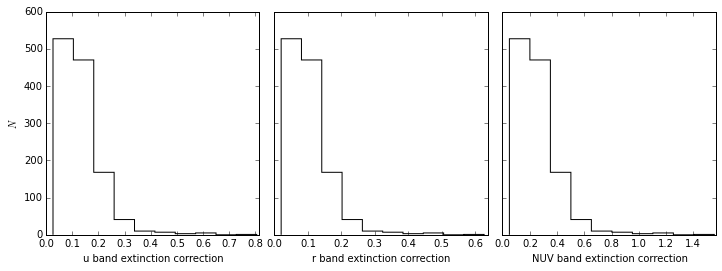

In [12]:
P.figure(figsize=(12,4))
ax1 = P.subplot(131)
ax1.hist(data['u ext correction'], histtype='step', color='k')
ax1.set_xlabel('u band extinction correction')
ax1.set_ylabel(r'$N$')
ax1.set_xlim(0, np.max(data['u ext correction'])+0.01)
ax2 = P.subplot(132)
ax2.hist(data['r ext correction'], histtype='step', color='k')
ax2.set_xlabel('r band extinction correction')
ax2.tick_params('y', labelleft='off')
ax2.set_xlim(0, np.max(data['r ext correction'])+0.01)
ax3 = P.subplot(133)
ax3.hist(data['NUV ext correction'], histtype='step', color='k')
ax3.set_xlabel('NUV band extinction correction')
ax3.set_xlim(0, np.max(data['NUV ext correction'])+0.01)
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('extinction_ebv_correction_tpye_2.png', facecolor='None', edgecolor='None')

In [13]:
data['NUV_FLUX_AUTO'].name = 'nuv flux auto'
data['NUV_FLUXERR_AUTO'].name = 'nuv flux auto err'
data['NUV_FLUX_APER_3'].name = 'nuv flux 5px'
data['NUV_FLUXERR_APER_3'].name = 'nuv flux 5px err'
data['NUV_FLUX_APER_2'].name = 'nuv flux 3px'
data['NUV_FLUXERR_APER_2'].name = 'nuv flux 3px err'
data['petroMag_u_2'].name = 'petro mag u'
data['petroMagErr_u_2'].name = 'petro mag u err'
data['petroMag_r_2'].name = 'petro mag r'
data['petroMagErr_r_2'].name = 'petro mag r err'
data['psfMag_u'].name = 'psf mag u'
data['psfMagErr_u'].name = 'psf mag u err'
data['psfMag_r'].name = 'psf mag r'
data['psfMagErr_r'].name = 'psf mag r err'

In [14]:
nuv_ab_auto = Column(name='nuv ab mag auto', data=(-2.5*np.log10(data['nuv flux auto'].quantity.value) + 20.08), dtype=float, unit=u.mag)
nuv_ab_auto_err = Column(name='nuv ab mag auto err', data=((1/np.log(10))*(data['nuv flux auto err'].quantity.value/data['nuv flux auto'].quantity.value)), dtype=float, unit=u.mag)
nuv_ab_5px = Column(name='nuv ab mag 5px', data=(-2.5*np.log10(data['nuv flux 5px'].quantity.value) + 20.08), dtype=float, unit=u.mag)
nuv_ab_5px_err = Column(name='nuv ab mag 5px err', data=((1/np.log(10))*(data['nuv flux 5px err'].quantity.value/data['nuv flux 5px'].quantity.value)), dtype=float, unit=u.mag)
nuv_ab_3px = Column(name='nuv ab mag 3px', data=(-2.5*np.log10(data['nuv flux 3px'].quantity.value) + 20.08), dtype=float, unit=u.mag)
nuv_ab_3px_err = Column(name='nuv ab mag 3px err', data=((1/np.log(10))*(data['nuv flux 3px err'].quantity.value/data['nuv flux 5px'].quantity.value)), dtype=float, unit=u.mag)

data.add_columns([nuv_ab_auto, nuv_ab_auto_err, nuv_ab_5px, nuv_ab_5px_err, nuv_ab_3px, nuv_ab_3px_err])

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


In [15]:
idx = np.where(np.isnan(nuv_ab_auto))
data.remove_rows(idx)

In [16]:
data['z_1'].name = 'redshift'

In [17]:
petro_u_kcor_val = Column(name='petro u kcor value', data=(calc_kcor('u', data['redshift'].quantity.value, 'u - r', data['petro mag u'].quantity.value - data['petro mag r'].quantity.value)), dtype=float)
petro_r_kcor_val = Column(name='petro r kcor value', data=(calc_kcor('r', data['redshift'].quantity.value, 'u - r', data['petro mag u'].quantity.value - data['petro mag r'].quantity.value)), dtype=float)
petro_nuv_kcor_val = Column(name='petro nuv kcor value', data=(calc_kcor('NUV', data['redshift'].quantity.value, 'NUV - r', data['nuv ab mag auto'].quantity.value - data['petro mag r'].quantity.value)), dtype=float)
psf_u_kcor_val = Column(name='psf u kcor value', data=(calc_kcor('u', data['redshift'].quantity.value, 'u - r', data['psf mag u'].quantity.value - data['psf mag r'].quantity.value)), dtype=float)
psf_r_kcor_val = Column(name='psf r kcor value', data=(calc_kcor('r', data['redshift'].quantity.value, 'u - r', data['psf mag u'].quantity.value - data['psf mag r'].quantity.value)), dtype=float)
psf_nuv_kcor_val_5px = Column(name='psf nuv kcor value 5px', data=(calc_kcor('NUV', data['redshift'].quantity.value, 'NUV - r', data['nuv ab mag 5px'].quantity.value - data['psf mag r'].quantity.value)), dtype=float)
psf_nuv_kcor_val_3px = Column(name='psf nuv kcor value 3px', data=(calc_kcor('NUV', data['redshift'].quantity.value, 'NUV - r', data['nuv ab mag 3px'].quantity.value - data['psf mag r'].quantity.value)), dtype=float)

data.add_columns([petro_u_kcor_val, petro_r_kcor_val, petro_nuv_kcor_val, psf_u_kcor_val, psf_r_kcor_val, psf_nuv_kcor_val_5px, psf_nuv_kcor_val_3px])

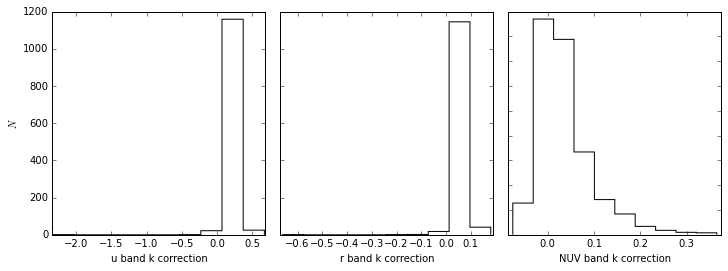

In [18]:
P.figure(figsize=(12,4))
ax1 = P.subplot(131)
ax1.hist(petro_u_kcor_val, histtype='step', color='k')
ax1.set_xlabel('u band k correction')
ax1.set_ylabel(r'$N$')
ax1.set_xlim(np.min(petro_u_kcor_val) - 0.01, np.max(petro_u_kcor_val)+0.01)
ax2 = P.subplot(132)
ax2.hist(petro_r_kcor_val, histtype='step', color='k')
ax2.set_xlabel('r band k correction')
ax2.tick_params('y', labelleft='off')
ax2.set_xlim(np.min(petro_r_kcor_val) - 0.01, np.max(petro_r_kcor_val)+0.01)
ax3 = P.subplot(133)
ax3.hist(petro_nuv_kcor_val, histtype='step', color='k')
ax3.set_xlabel('NUV band k correction')
ax3.set_xlim(np.min(petro_nuv_kcor_val) - 0.01,  np.max(petro_nuv_kcor_val)+0.01)
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('k_corrections_type_2.png', facecolor='None', edgecolor='None')

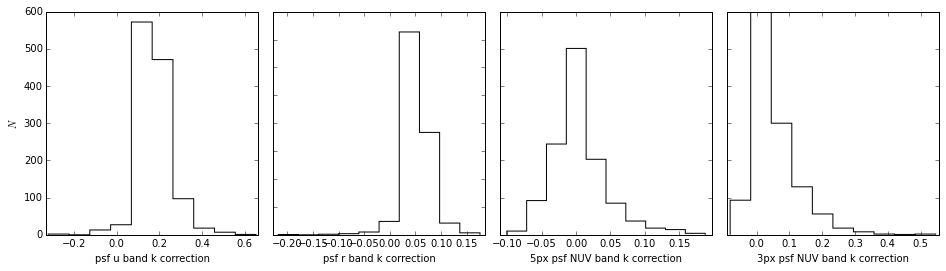

In [19]:
P.figure(figsize=(16,4))
ax1 = P.subplot(141)
ax1.hist(psf_u_kcor_val, histtype='step', color='k')
ax1.set_xlabel('psf u band k correction')
ax1.set_ylabel(r'$N$')
ax1.set_xlim(np.min(psf_u_kcor_val) - 0.01, np.max(psf_u_kcor_val)+0.01)
ax2 = P.subplot(142)
ax2.hist(psf_r_kcor_val, histtype='step', color='k')
ax2.set_xlabel('psf r band k correction')
ax2.tick_params('y', labelleft='off')
ax2.set_xlim(np.min(psf_r_kcor_val) - 0.01, np.max(psf_r_kcor_val)+0.01)
ax3 = P.subplot(143)
ax3.hist(psf_nuv_kcor_val_5px, histtype='step', color='k')
ax3.set_xlabel('5px psf NUV band k correction')
ax3.set_xlim(np.min(psf_nuv_kcor_val_5px) - 0.01,  np.max(psf_nuv_kcor_val_5px)+0.01)
ax3.tick_params('y', labelleft='off')
ax4 = P.subplot(144)
ax4.hist(psf_nuv_kcor_val_3px, histtype='step', color='k')
ax4.set_xlabel('3px psf NUV band k correction')
ax4.set_xlim(np.min(psf_nuv_kcor_val_3px) - 0.01,  np.max(psf_nuv_kcor_val_3px+0.01))
ax4.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('psf_band_kcorrection.png', facecolor='None', edgecolor='None')

In [20]:
petro_u_corr = Column(name='petro u corr', data=(data['petro mag u'].quantity.value - data['petro u kcor value'].quantity.value - data['u ext correction'].quantity.value), dtype=float, unit=u.mag)
petro_r_corr = Column(name='petro r corr', data=(data['petro mag r'].quantity.value - data['petro r kcor value'].quantity.value - data['r ext correction'].quantity.value), dtype=float, unit=u.mag)
petro_nuv_corr = Column(name='petro nuv corr', data=(data['nuv ab mag auto'].quantity.value - data['petro nuv kcor value'].quantity.value - data['NUV ext correction'].quantity.value), dtype=float, unit=u.mag)
psf_u_corr = Column(name='psf u corr', data=(data['psf mag u'].quantity.value - data['psf u kcor value'].quantity.value - data['u ext correction'].quantity.value), dtype=float, unit=u.mag)
psf_r_corr = Column(name='psf r corr', data=(data['psf mag r'].quantity.value - data['psf r kcor value'].quantity.value - data['r ext correction'].quantity.value), dtype=float, unit=u.mag)
psf_nuv_5px_corr = Column(name='psf nuv 5px corr', data=(data['nuv ab mag 5px'].quantity.value - data['psf nuv kcor value 5px'].quantity.value - data['NUV ext correction'].quantity.value), dtype=float, unit=u.mag)
psf_nuv_3px_corr = Column(name='psf nuv 3px corr', data=(data['nuv ab mag 3px'].quantity.value - data['psf nuv kcor value 3px'].quantity.value - data['NUV ext correction'].quantity.value), dtype=float, unit=u.mag)

In [21]:
data.add_columns([petro_u_corr, petro_r_corr, petro_nuv_corr, psf_u_corr, psf_r_corr, psf_nuv_5px_corr, psf_nuv_3px_corr])

In [22]:
print data

    dr7objid_1       ra1       dec1    ... psf nuv 5px corr psf nuv 3px corr
                     deg       deg     ...       mag              mag       
------------------ ------- ----------- ... ---------------- ----------------
587722981745426489  192.25    -1.15984 ...    20.3965131926    21.1493372425
587722981747654761 197.365    -1.06142 ...    20.5402099454     21.377214011
587722983359578208 200.347   0.0781756 ...    19.2273931913    20.0010664345
587722983366787312 216.833    0.099807 ...    20.5119879219    21.6475963342
587722983373734136  232.61  0.00299794 ...    20.7355094955    21.3907663423
587722983901495472 211.847    0.475643 ...    20.7356399921    21.5936472894
587722983910146278 231.657    0.592628 ...    20.7225776992    21.2863307304
587722984429191300 190.839    0.989937 ...    20.8302570696     21.649636182
587722984438956257 213.247    0.921185 ...    21.7505877251    22.6164108964
587722984445575358 228.344    0.871375 ...    21.1013103921    22.0168977525

In [23]:
nuv_gal_5px = Column(name='nuv gal 5px', data=(-2.5*np.log10((10**(data['petro nuv corr'].quantity.value/-2.5))-(10**(data['psf nuv 5px corr'].quantity.value/-2.5)))), dtype=float, unit=u.mag)
nuv_gal_5px_err = Column(name ='nuv gal 5px err', data=((1/(10**(data['petro nuv corr'].quantity.value/-2.5))-(10**(data['psf nuv 5px corr'].quantity.value/-2.5)))*((((data['nuv ab mag auto err'].quantity.value*(10**(data['petro nuv corr'].quantity.value/-2.5)))**2)-((data['nuv ab mag 5px err'].quantity.value*(10**(data['psf nuv 5px corr'].quantity.value/-2.5)))**2))**(0.5))), dtype=float)
nuv_gal_3px = Column(name='nuv gal 3px', data=(-2.5*np.log10((10**(data['petro nuv corr'].quantity.value/-2.5))-(10**(data['psf nuv 3px corr'].quantity.value/-2.5)))), dtype=float, unit=u.mag)
nuv_gal_3px_err = Column(name ='nuv gal 3px err', data=((1/(10**(data['petro nuv corr'].quantity.value/-2.5))-(10**(data['psf nuv 3px corr'].quantity.value/-2.5)))*((((data['nuv ab mag auto err'].quantity.value*(10**(data['petro nuv corr'].quantity.value/-2.5)))**2)-((data['nuv ab mag 3px err'].quantity.value*(10**(data['psf nuv 3px corr'].quantity.value/-2.5)))**2))**(0.5))), dtype=float)
u_gal = Column(name='u gal', data=(-2.5*np.log10((10**(data['petro u corr'].quantity.value/-2.5))-(10**(data['psf u corr'].quantity.value/-2.5)))), dtype=float, unit=u.mag)
u_gal_err = Column(name ='u gal err', data=((1/(10**(data['petro u corr'].quantity.value/-2.5))-(10**(data['psf u corr'].quantity.value/-2.5)))*((((data['petro mag r err'].quantity.value*(10**(data['petro r corr'].quantity.value/-2.5)))**2)-((data['psf mag r err'].quantity.value*(10**(data['psf r corr'].quantity.value/-2.5)))**2))**(0.5))), dtype=float)
r_gal = Column(name='r gal', data=(-2.5*np.log10((10**(data['petro r corr'].quantity.value/-2.5))-(10**(data['psf r corr'].quantity.value/-2.5)))), dtype=float, unit=u.mag)
r_gal_err = Column(name ='r gal err', data=((1/(10**(data['petro r corr'].quantity.value/-2.5))-(10**(data['psf r corr'].quantity.value/-2.5)))*((((data['petro mag r err'].quantity.value*(10**(data['petro r corr'].quantity.value/-2.5)))**2)-((data['psf mag r err'].quantity.value*(10**(data['psf r corr'].quantity.value/-2.5)))**2))**(0.5))), dtype=float)

data.add_columns([nuv_gal_3px, nuv_gal_3px_err, nuv_gal_5px, nuv_gal_5px_err, u_gal, u_gal_err, r_gal, r_gal_err])

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


In [24]:
idx = np.where(np.isnan(data['u gal'].quantity.value))[0]
data.remove_rows(idx)

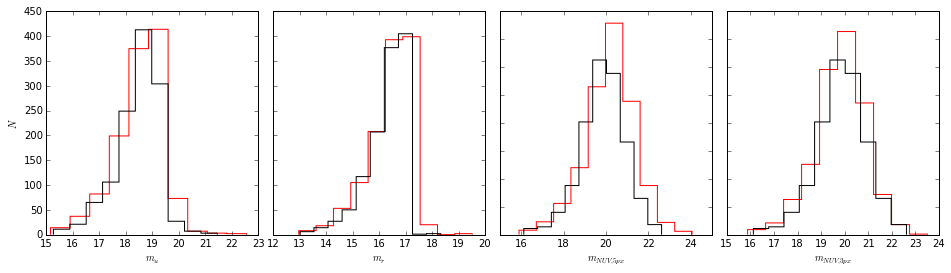

In [25]:
P.figure(figsize=(16,4))
ax1 = P.subplot(141)
ax1.hist(data['u gal'], histtype='step', color='r')
ax1.hist(data['petro mag u'], histtype='step', color='k')
ax1.set_xlabel(r'$m_u$')
ax1.set_ylabel(r'$N$')
ax2 = P.subplot(142)
ax2.hist(data['r gal'], histtype='step', color='r')
ax2.hist(data['petro mag r'], histtype='step', color='k')
ax2.set_xlabel(r'$m_r$')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(143)
ax3.hist(data['nuv gal 5px'], histtype='step', color='r')
ax3.hist(data['nuv ab mag auto'], histtype='step', color='k')
ax3.set_xlabel(r'$m_{NUV, 5px}$')
ax3.tick_params('y', labelleft='off')
ax4 = P.subplot(144)
ax4.hist(data['nuv gal 3px'], histtype='step', color='r')
ax4.hist(data['nuv ab mag auto'], histtype='step', color='k')
ax4.set_xlabel(r'$m_{NUV, 3px}$')
ax4.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('comparison_magnitudes_before_after_agn_contribution_removal_and_kcorr_type_2.png' , facecolor='None', edgecolor='None')

In [31]:
print np.mean(data['u gal'])
print np.mean(data['petro mag u'])

18.5289826448
18.4730256426


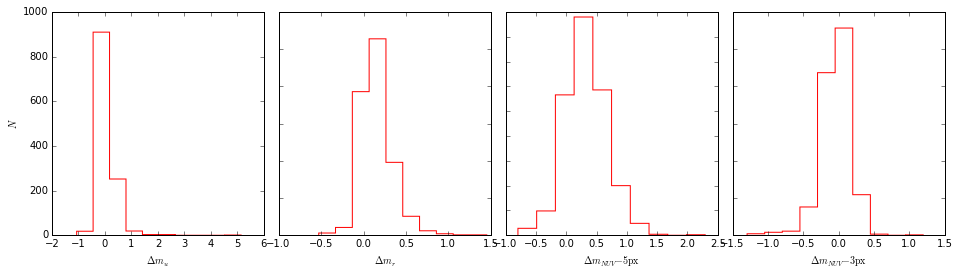

In [45]:
P.figure(figsize=(16,4))
ax1 = P.subplot(141)
ax1.hist(data['u gal'] - data['petro mag u'], histtype='step', color='r')
ax1.set_xlabel(r'$\Delta m_u$')
ax1.set_ylabel(r'$N$')
ax2 = P.subplot(142)
ax2.hist(data['r gal'] - data['petro mag r'], histtype='step', color='r')
ax2.set_xlabel(r'$\Delta m_r$')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(143)
ax3.hist(data['nuv gal 5px'] - data['nuv ab mag auto'], histtype='step', color='r')
ax3.set_xlabel(r'$\Delta m_{NUV} - \rm{5px}$')
ax3.tick_params('y', labelleft='off')
ax4 = P.subplot(144)
ax4.hist(data['nuv gal 3px'] - data['nuv ab mag auto'], histtype='step', color='r')
ax4.set_xlabel(r'$\Delta m_{NUV} - \rm{3px}$')
ax4.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('delta_magnitudes_before_after_agn_contribution_removal_and_kcorr_type_2.png' , facecolor='None', edgecolor='None')

In [46]:
u_r = Column(name='u - r', data=(data['u gal'].quantity.value - data['r gal'].quantity.value), dtype=float, unit=u.mag)
u_r_err = Column(name = 'u - r err', data=(((data['u gal err'].quantity.value)**2 + (data['r gal err'].quantity.value)**2)**(0.5)), dtype=float, unit=u.mag)
nuv_u_5px = Column(name='nuv - u 5px', data=(data['nuv gal 5px'].quantity.value - data['u gal'].quantity.value), dtype=float, unit=u.mag)
nuv_u_5px_err = Column(name = 'nuv - u 5px err', data=(((data['u gal err'].quantity.value)**2 + (data['nuv gal 5px err'].quantity.value)**2)**(0.5)), dtype=float, unit=u.mag)
nuv_u_3px = Column(name='nuv - u 3px', data=(data['nuv gal 3px'].quantity.value - data['u gal'].quantity.value), dtype=float, unit=u.mag)
nuv_u_3px_err = Column(name = 'nuv - u 3px err', data=(((data['u gal err'].quantity.value)**2 + (data['nuv gal 3px err'].quantity.value)**2)**(0.5)), dtype=float, unit=u.mag)

data.add_columns([u_r, u_r_err, nuv_u_3px, nuv_u_3px_err, nuv_u_5px, nuv_u_5px_err])

In [31]:
data['u - r err'][np.isnan(data['u - r err']) == True] = np.mean(data['u - r err'][np.isnan(data['u - r err'])==False])
data['nuv - u 5px err'][np.isnan(data['nuv - u 5px err']) == True] = np.mean(data['nuv - u 5px err'][np.isnan(data['nuv - u 5px err'])==False])
data['nuv - u 5px err'][np.isnan(data['nuv - u 3px err']) == True] = np.mean(data['nuv - u 3px err'][np.isnan(data['nuv - u 3px err'])==False])

In [32]:
data['nuv - u 3px err'][np.isnan(data['nuv - u 3px err']) == True] = np.mean(data['nuv - u 3px err'][np.isnan(data['nuv - u 3px err']) == False])

In [33]:
data['nuv - u 5px err'][np.isnan(data['nuv - u 5px err']) == True] = np.mean(data['nuv - u 5px err'][np.isnan(data['nuv - u 5px err']) == False])

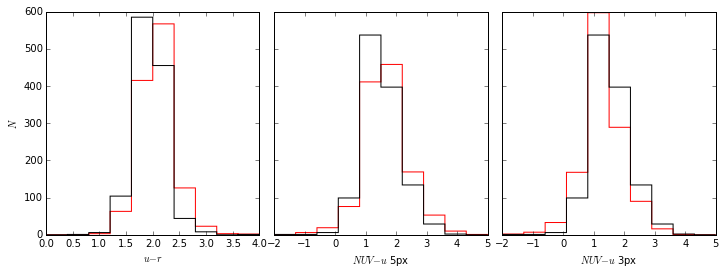

In [48]:
P.figure(figsize=(12,4))
ax1 = P.subplot(131)
ax1.hist(data['u - r'], histtype='step', color='r', range=(0,4))
ax1.hist(data['MU_MR'], histtype='step', color='k', range=(0,4))
ax1.set_xlabel(r'$u - r$')
ax1.set_ylabel(r'$N$')
ax2 = P.subplot(132)
ax2.hist(data['nuv - u 5px'], histtype='step', color='r', range=(-2,5))
ax2.hist(data['NUV_U'], histtype='step', color='k', range=(-2,5))
ax2.set_xlabel(r'$NUV - u$ 5px')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.hist(data['nuv - u 3px'], histtype='step', color='r', range=(-2,5))
ax3.hist(data['NUV_U'], histtype='step', color='k', range=(-2,5))
ax3.set_xlabel(r'$NUV - u$ 3px')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('colour_comparison_before_after_agn_contribution_removal_and_kcorr_type_2.png', facecolor='None', edgecolor='None')

In [81]:
print np.median(data['u - r'])
print np.mean(data['u - r'])
print np.median(data['u - r err'])
print np.mean(data['u - r err'])
print np.median(data['NUV_U'])
print np.mean(data['NUV_U'])
print np.median(data['Err_NUV_U'])
print np.mean(data['Err_NUV_U'])

2.08208216024
2.09399257258
0.0619518112986
nan
1.45055961609
1.52108748754
0.144417222958
0.1701710835


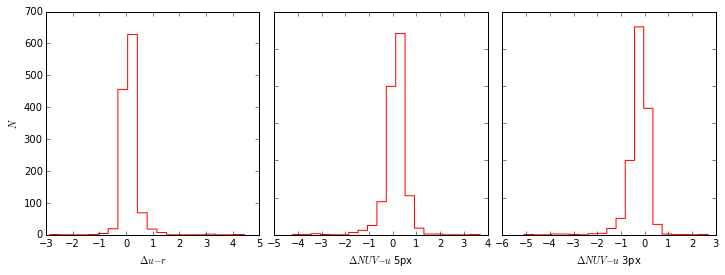

In [50]:
P.figure(figsize=(12,4))
ax1 = P.subplot(131)
ax1.hist(data['u - r'] - data['MU_MR'], histtype='step', color='r', bins=20)
ax1.set_xlabel(r'$\Delta u - r$')
ax1.set_ylabel(r'$N$')
ax2 = P.subplot(132)
ax2.hist(data['nuv - u 5px'] - data['NUV_U'], histtype='step', color='r', bins=20)
ax2.set_xlabel(r'$ \Delta NUV - u$ 5px')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.hist(data['nuv - u 3px'] - data['NUV_U'], histtype='step', color='r', bins=20)
ax3.set_xlabel(r'$\Delta NUV - u$ 3px')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('delta_colour_before_after_agn_contribution_removal_and_kcorr_type_2.png', facecolor='None', edgecolor='None')

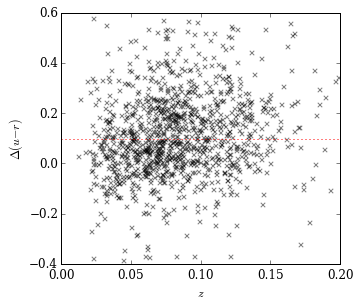

In [76]:
font = {'family':'serif', 'size':12}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')
P.figure(figsize=(5,4.5))
P.scatter(data['redshift'], data['u - r'] - data['MU_MR'], color='k', marker='x', alpha=0.5)
P.ylim(-0.4,0.6)
P.xlim(0.0, 0.2)
P.xlabel(r'$z$')
P.ylabel(r'$\Delta(u-r)$')
P.axhline(np.median(data['u - r'] - data['MU_MR']), color='r', linestyle='dotted')

In [36]:
from scipy.stats import kde

In [37]:
h = np.load('galaxy_data_extra_agn_oh_sample_match_header.npy')

In [279]:
X, Y = np.mgrid[0:4:100j, -2:5:100j]
pos = np.vstack([X.ravel(), Y.ravel()])
density = kde.gaussian_kde(np.vstack([h[:,334].astype(float), h[:,336].astype(float)]))
kernel = np.reshape(density(pos).T, X.shape)

In [191]:
den_agn_pre = kde.gaussian_kde(np.vstack([data['col335'], data['col337']]))
kernel_agn_pre = np.reshape(den_agn_pre(pos).T, X.shape)
den_agn_5px = kde.gaussian_kde(np.vstack([data['u - r'], data['nuv - u 5px']]))
kernel_agn_5px = np.reshape(den_agn_5px(pos).T, X.shape)
den_agn_3px = kde.gaussian_kde(np.vstack([data['u - r'], data['nuv - u 3px']]))
kernel_agn_3px = np.reshape(den_agn_3px(pos).T, X.shape)

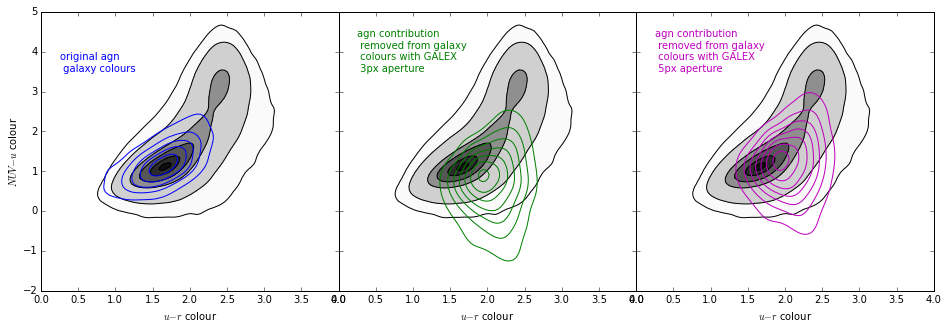

In [47]:
P.figure(figsize=(16,5))
ax1 = P.subplot(131)
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax1.contour(X,Y, kernel_agn_pre, colors='b', label ='original agn colours')
ax1.set_xlabel(r'$u-r$ colour')
ax1.set_ylabel(r'$NUV - u$ colour')
P.text(0.25, 3.5, 'original agn \n galaxy colours', color='b')
ax2 = P.subplot(132)
ax2.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax2.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax2.contour(X,Y, kernel_agn_3px, colors='g', label ='agn contribution removed with GALEX 3px')
ax2.set_xlabel(r'$u-r$ colour')
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 3px aperture', color='g')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax3.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax3.contour(X,Y, kernel_agn_5px, colors='m', label ='agn contribution removed with GALEX 5px')
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 5px aperture', color='m')
ax3.set_xlabel(r'$u-r$ colour')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.0)
P.savefig('colour_colour_comparison_before_after_agn_contribution_removal.png', facecolor='None', edgecolor='None')

In [84]:
f = open('params.3px.txt', 'a')
for n in range(len(data)):
    f.write('python glamdring_run.py '+str(data['u - r'][n])+' '+str(data['u - r err'][n])+' '+str(data['nuv - u 3px'][n])+' '+str(data['nuv - u 3px err'][n])+' '+str(data['redshift'][n])+' '+str(data['col4'][n])+' '+str(data['col3'][n])+' '+str('%18i' % data['col14'][n])+' '+str(data['RA'][n])+' '+str(data['Dec'][n])+'\n')

f.close()

In [85]:
f = open('params.5px.txt', 'a')
for n in range(len(data)):
    f.write('python glamdring_run.py '+str(data['u - r'][n])+' '+str(data['u - r err'][n])+' '+str(data['nuv - u 5px'][n])+' '+str(data['nuv - u 5px err'][n])+' '+str(data['redshift'][n])+' '+str(data['col4'][n])+' '+str(data['col3'][n])+' '+str('%18i' % data['col14'][n])+' '+str(data['RA'][n])+' '+str(data['Dec'][n])+'\n')

f.close()

In [42]:
data.write('/Users/becky/Projects/followup_gv/oh_sample/agn_oh_sample_gz2_match_gal_mag_5px_3px.fits', format='fits')

In [43]:
r_data = Table.read('/Users/becky/Projects/followup_gv/oh_sample/agn_oh_sample_gz2_match_gal_mag_5px_3px_petro90pc_radius.fits', format='fits')

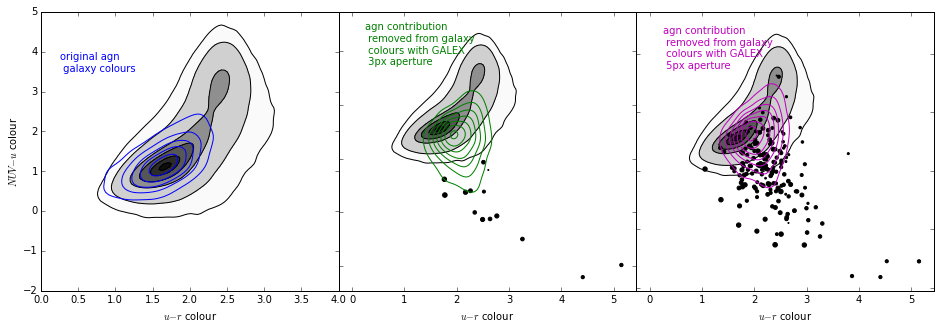

In [98]:
lt7 = r_data[np.where(2*r_data['petroR90_u'] < 7)]
lt45 = r_data[np.where(2*r_data['petroR90_u'] < 4.5)]
xs = lt7['col362']
lum = 1 + (xs-np.min(xs))*20/(np.max(xs)-np.min(xs))

xs = lt45['col362']
lum3 = 1 + (xs-np.min(xs))*20/(np.max(xs)-np.min(xs))

P.figure(figsize=(16,5))
ax1 = P.subplot(131)
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax1.contour(X,Y, kernel_agn_pre, colors='b', label ='original agn colours')
ax1.set_xlabel(r'$u-r$ colour')
ax1.set_ylabel(r'$NUV - u$ colour')
P.text(0.25, 3.5, 'original agn \n galaxy colours', color='b')
ax2 = P.subplot(132)
ax2.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax2.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax2.contour(X,Y, kernel_agn_3px, colors='g', label ='agn contribution removed with GALEX 3px')
ax2.set_xlabel(r'$u-r$ colour')
ax2.scatter(lt45['u - r'], lt45['nuv - u 3px'], color='k', marker='o', s=lum3)
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 3px aperture', color='g')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax3.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax3.contour(X,Y, kernel_agn_5px, colors='m', label ='agn contribution removed with GALEX 5px')
ax3.scatter(lt7['u - r'], lt7['nuv - u 5px'], color='k', marker='o', s = lum)
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 5px aperture', color='m')
ax3.set_xlabel(r'$u-r$ colour')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.0)
P.savefig('colour_colour_comparison_before_after_agn_contribution_removal_petroR90.png', facecolor='None', edgecolor='None')

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


ValueError: zero-size array to reduction operation minimum which has no identity

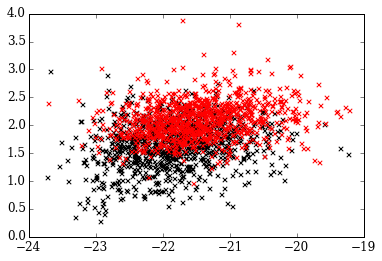

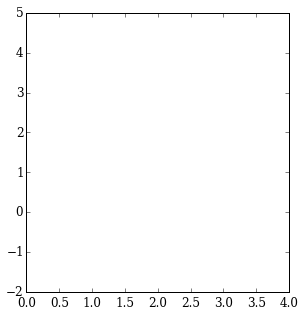

In [188]:
D_L_term = data['col283'] - data['col297']
abs_m_gal = data['r gal'] - D_L_term

X, Y = np.mgrid[0:4:100j, -2:5:100j]
pos = np.vstack([X.ravel(), Y.ravel()])
density = kde.gaussian_kde(np.vstack([data['col297'], data['col335']]))
print density
kernel = np.reshape(density(pos).T, X.shape)
print kernel

P.scatter(data['col297'], data['col335'], color='k', marker='x')
P.scatter(abs_m_gal, data['u - r'], color='r', marker='x')
P.xlim(-24, -19)
P.ylim(0,4)
den_agn_pre = kde.gaussian_kde(np.vstack([data['col297'], data['col335']]))
kernel_agn_pre = np.reshape(den_agn_pre(pos).T, X.shape)
den_agn_5px = kde.gaussian_kde(np.vstack([abs_m_gal, data['u - r']]))
kernel_agn_5px = np.reshape(den_agn_5px(pos).T, X.shape)
den_agn_3px = kde.gaussian_kde(np.vstack([abs_m_gal, data['u - r']]))
kernel_agn_3px = np.reshape(den_agn_3px(pos).T, X.shape)

P.figure(figsize=(16,5))
ax1 = P.subplot(131)
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax1.contour(X,Y, kernel_agn_pre, colors='b', label ='original agn colours')
ax1.set_xlabel(r'$M_r')
ax1.set_ylabel(r'$u -r$ colour')
P.text(0.25, 3.5, 'original agn \n galaxy colours', color='b')
ax2 = P.subplot(132)
ax2.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax2.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax2.contour(X,Y, kernel_agn_3px, colors='g', label ='agn contribution removed with GALEX 3px')
ax2.set_xlabel(r'$M_r$')
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 3px aperture', color='g')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax3.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax3.contour(X,Y, kernel_agn_5px, colors='m', label ='agn contribution removed with GALEX 5px')
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 5px aperture', color='m')
ax3.set_xlabel(r'$M_r$')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.0)
P.savefig('colour_colour_comparison_before_after_agn_contribution_removal_petroR90.png', facecolor='None', edgecolor='None')

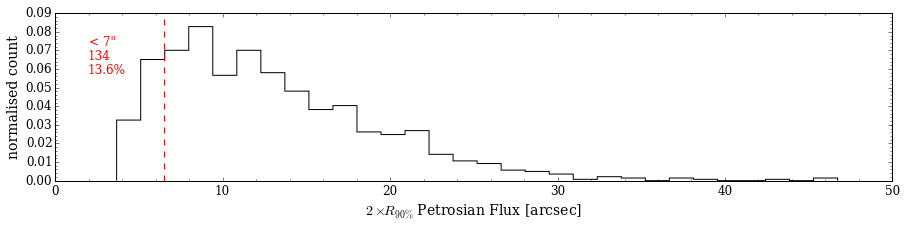

In [181]:
num = len(r_data[np.where(2*r_data['petroR90_u'] < 6.5)])
P.figure(figsize=(15,3))
P.hist(2*r_data['petroR90_u'], color='k', histtype='step', bins=30, normed=True)
P.axvline(6.5, color='r', linestyle='dashed')
P.text(2, 0.0725, '< 7"', color='r')
P.text(2, 0.065, str(num), color='r')
P.text(2, 0.0575, '%3.1f' % ((num/float(len(r_data))*100))+'%', color='r')
P.minorticks_on()
P.xlabel(r'$2 \times R_{90\%}$ Petrosian Flux [arcsec]', fontsize=14)
P.ylabel('normalised count', fontsize=14)
P.savefig('hist_number_galaxies_less_7arcsec_size.pdf')

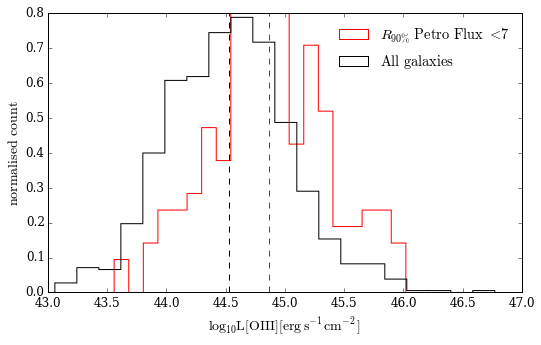

In [147]:
font = {'family':'serif', 'size':12}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')
P.figure(figsize=(8.5,5))
P.hist(lt7['col362'], histtype='step', color='r', normed=True, bins=20, label=r'$R_{90\%}$ $\rm{Petro}$ $\rm{Flux}$ $< 7"$')
P.hist(r_data['col362'], histtype='step', color='k', normed=True, bins=20, label=r'$\rm{All}$ $\rm{galaxies}$')
P.axvline(np.mean(lt7['col362']), linestyle='dashed', c='r')
P.axvline(np.mean(r_data['col362']), linestyle='dashed', c='k')
P.xlabel(r'$\rm{log_{10}} L[OIII] \rm{[erg^{}_{ }s^{-1}cm^{-2}]}$ ', fontsize=14)
P.ylabel(r'$\rm{normalised}$ $\rm{count}$', fontsize=14)
P.legend(frameon=False)
P.savefig('histogram_luminosity_r90_lt_7.pdf')

    r gal     
     mag      
--------------
-21.1534584337
-20.8283112779
-21.2286952763
-22.3528424829
-21.0149407375
-20.7086309224
-21.7706390104
-21.9212479661
-21.8311981962
-22.3123569403
           ...
-22.0002360012
-20.5183951114
-21.9952026477
-21.8381698717
-20.8545717959
-21.1715401758
-21.4559650101
-20.3233975023
-21.3158418557
-21.6713696427
Length = 984 rows
[ 10.52978752  10.49758711  10.60236811  10.84543133  10.40718028
  10.35426144  10.58965318  10.65742318  10.78150261  10.97366422
  10.60497312  10.98309212  10.84724063  10.40586949  10.61636521
  10.23663601  10.74796857  10.51528823  10.36582345  10.92947074
  10.96960059  10.34342267  10.49432951  10.8100324   10.2924539
  10.8672378   10.26853732  10.85937988  10.54135805  10.93280183
  10.75320876  10.59409657  10.66678513  10.47083023  10.84693582
  10.49530711  10.52417966  10.62278083  10.51661902  10.39605417
  10.76152405  10.49706361  10.64542406  10.66569991  10.96416323
  10.09647867  10.844434    1

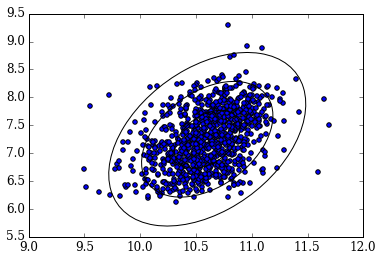

In [153]:
D_L_term = r_data['col283'] - r_data['col297'] #5(log10(DL)-1) = m - M
abs_m_gal = r_data['r gal'] - D_L_term
ur_gal = r_data['u - r']
print abs_m_gal
log_m_l = np.zeros(len(ur_gal))
m_msun = np.zeros_like(log_m_l)

for j in range(len(log_m_l)):
    if ur_gal[j] <=2.1:
        log_m_l[j] = -0.95 + 0.56 * ur_gal[j]
    else:
        log_m_l[j] = -0.16 + 0.18 * ur_gal[j]
    m_msun[j] = (((4.62 - abs_m_gal[j])/2.5) + log_m_l[j])
print m_msun

from matplotlib.patches import Ellipse
cov = np.cov(m_msun, r_data['col359'])
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
P.figure()
ax = P.subplot(111)
for j in xrange(1, 4):
    ell = Ellipse(xy=(np.mean(m_msun), np.mean(r_data['col359'])),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ax.add_artist(ell)
P.scatter(m_msun, r_data['col359'])

In [282]:
h[:,296]

array(['-22.270242691', '-23.7223072052', '-20.6460952759', ...,
       '-19.0649795532', '-22.9669589996', '-22.1799449921'], 
      dtype='|S32')

(array([  44.,  534.,  373.,   26.,    2.,    2.,    1.,    1.,    0.,    1.]),
 array([ 0.94883466,  1.55755291,  2.16627116,  2.77498942,  3.38370767,
         3.99242592,  4.60114418,  5.20986243,  5.81858068,  6.42729894,
         7.03601719]),
 <a list of 10 Patch objects>)

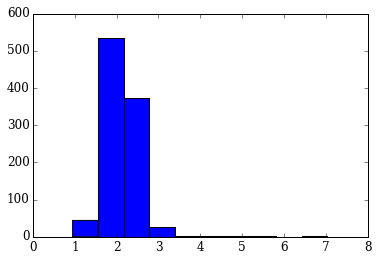

In [308]:
D_L_term = data['col283'] - data['col297']
abs_m_gal = data['r gal'] - D_L_term
P.hist(data['u - r'])

In [ ]:
X2, Y2 = np.mgrid[-24:-17:100j, 0:4:100j]
pos2 = np.vstack([X2.ravel(), Y2.ravel()])
density2 = kde.gaussian_kde(np.vstack([h[:,296].astype(float), h[:,334].astype(float)]))
print density
kernel2 = np.reshape(density2(pos2).T, X2.shape)

In [314]:
den_agn_5px_2 = kde.gaussian_kde(np.vstack([abs_m_gal, data['u - r']]))
kernel_agn_5px_2 = np.reshape(den_agn_5px_2(pos2).T, X2.shape)
print np.max(kernel_agn_5px_2)

0.612223028884


In [287]:
H, Xs, Ys = np.histogram2d(h[:,296].astype(float), h[:,334].astype(float), bins=50)


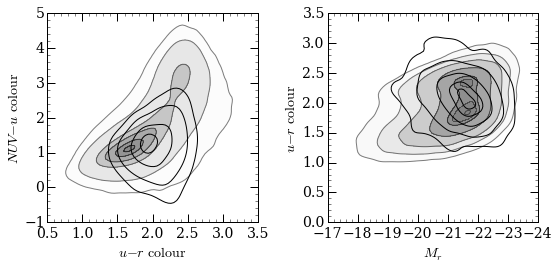

In [335]:
m = np.max(kernel_agn_5px_2.flatten())
P.figure(figsize=(8,4))
ax1 = P.subplot(121)
ax1.contour(X,Y, kernel_agn_5px, colors='k', levels=[0.16*m, 0.34*m, 0.68*m, 0.9*m, 0.98*m])
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8], alpha=0.5)
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9], alpha=0.5)
ax1.set_xlabel(r'$u-r$ $\rm{colour}$', fontsize=14)
ax1.set_ylabel(r'$NUV -u$ $\rm{colour}$', fontsize=14)
ax1.set_ylim(-1,5)
ax1.set_xlim(0.5, 3.5)
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax2 = P.subplot(122)
#ax2.contour(Xs[:-1], Ys[:-1], H.T, origin='lower', colors='k')
ax2.contour(X2,Y2, kernel2, colors='k', levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.34], alpha=0.5)
ax2.contourf(X2,Y2, kernel2, cmap=P.cm.binary, levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.32, 0.35], alpha=0.5)
ax2.contour(X2,Y2, kernel_agn_5px_2, colors='k', levels=[0.02, 0.1, 0.3, 0.5, 0.59])
ax2.set_xlabel(r'$M_r$', fontsize=14)
ax2.set_ylabel(r'$u-r$ $\rm{colour}$', fontsize=14)
ax2.set_ylim(0.0, 3.5)
ax2.set_xlim(-17, -24)
ax2.minorticks_on()
ax2.tick_params('both', which='major', length=8, width=1)
ax2.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('colour_colour_mag_comparison_agn_inactive.png', facecolor='None', edgecolor='None')

In [329]:
abs_m_d = abs_m_gal[np.where(data['col4'] > 0.5)]
abs_m_s = abs_m_gal[np.where(data['col3'] > 0.5)]
ur_d = data['u - r'][np.where(data['col4'] > 0.5)]
ur_s = data['u - r'][np.where(data['col3'] > 0.5)]
nuv_d = data['nuv - u 5px'][np.where(data['col4'] > 0.5)]
nuv_s = data['nuv - u 5px'][np.where(data['col3'] > 0.5)]

den_agn_5px_d = kde.gaussian_kde(np.vstack([abs_m_d, ur_d]))
kernel_agn_5px_d = np.reshape(den_agn_5px_d(pos2).T, X2.shape)
print np.max(kernel_agn_5px_d)

den_agn_5px_s = kde.gaussian_kde(np.vstack([abs_m_s, ur_s]))
kernel_agn_5px_s = np.reshape(den_agn_5px_s(pos2).T, X2.shape)
print np.max(kernel_agn_5px_s)

den_agn_5px_nuvu_d = kde.gaussian_kde(np.vstack([ur_d, nuv_d]))
kernel_agn_5px_nuvu_d = np.reshape(den_agn_5px_nuvu_d(pos).T, X.shape)
print np.max(kernel_agn_5px_nuvu_d)

den_agn_5px_nuvu_s = kde.gaussian_kde(np.vstack([ur_s, nuv_s]))
kernel_agn_5px_nuvu_s = np.reshape(den_agn_5px_nuvu_s(pos).T, X.shape)
print np.max(kernel_agn_5px_nuvu_s)

0.800070006852
0.472749553471
0.812901291203
0.356942758755


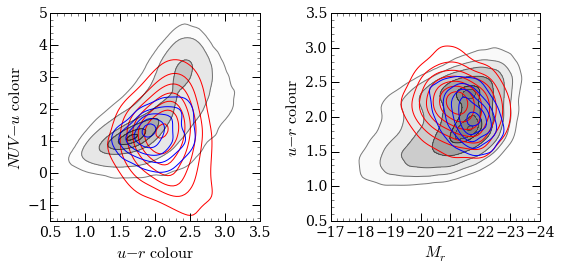

In [338]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')

P.figure(figsize=(8,4))
ax1 = P.subplot(121)
ax1.contour(X,Y, kernel_agn_5px_nuvu_s, colors='r')
ax1.contour(X,Y, kernel_agn_5px_nuvu_d, colors='b')
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8], alpha=0.5)
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9], alpha=0.5)
ax1.set_xlabel(r'$u-r$ $\rm{colour}$', fontsize=16)
ax1.set_ylabel(r'$NUV -u$ $\rm{colour}$', fontsize=16)
ax1.set_ylim(-1.5,5)
ax1.set_xlim(0.5, 3.5)
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax2 = P.subplot(122)
#ax2.contour(Xs[:-1], Ys[:-1], H.T, origin='lower', colors='k')
ax2.contour(X2,Y2, kernel2, colors='k', levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.34], alpha=0.5)
ax2.contourf(X2,Y2, kernel2, cmap=P.cm.binary, levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.32, 0.35], alpha=0.5)
ax2.contour(X2,Y2, kernel_agn_5px_s, colors='r')
ax2.contour(X2,Y2, kernel_agn_5px_d, colors='b')
ax2.set_xlabel(r'$M_r$', fontsize=16)
ax2.set_ylabel(r'$u-r$ $\rm{colour}$', fontsize=16)
ax2.set_ylim(0.5, 3.5)
ax2.set_xlim(-17, -24)
ax2.minorticks_on()
ax2.tick_params('both', which='major', length=8, width=1)
ax2.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('colour_colour_mag_comparison_agn_inactive.pdf', facecolor='None', edgecolor='None')